### Context
Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.

Here I will try to analysis of rating of the chocolate based on it's given features. The open datasets provided by Kaggle will be used for analysis.

In [1]:
## Imports for the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from subprocess import check_output

warnings.simplefilter('ignore')
%matplotlib inline

In [3]:
## Load data form flavors_of_cacao.csv
chocolate_data = pd.read_csv('./input/flavors_of_cacao.csv')
## prints (No. of Rows, No. of Columns) in chocolate_data dataframe
chocolate_data.shape

(1795, 9)

In [4]:
##preview of data with first five rows
chocolate_data.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


### Data description

* **Company (Maker-if known)** - Name of the company manufacturing the bar.
* **Specific Bean Origin or Bar Name** - The specific geo-region of origin for the bar.
* **REF** - Help us describe this column... What is it?
* **Review Date** - Date of publication of the review.
* **Cocoa Percent** - Cocoa percentage (darkness) of the chocolate bar being reviewed.
* **Company Location** - Manufacturer base country.
* **Rating** - Expert rating for the bar.
* **Bean Type** - The variety (breed) of bean used, if provided.
* **Broad Bean Origin** - The broad geo-region of origin for the bean.

### Flavors of Cacao Rating System:
* 5 = Elite (Transcending beyond the ordinary limits)
* 4 = Premium (Superior flavor development, character and style)
* 3 = Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
* 2 = Disappointing (Passable but contains at least one significant flaw)
* 1 = Unpleasant (mostly unpalatable)

Now we have some insights of what type of data we have and what each column (exept REF) mean for.

In [5]:
# Get the data types of columns
chocolate_data.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [6]:
# Rename the columns name
original_columns = chocolate_data.columns
new_columns = ['Company', 'SB_origin', 'REF', 'Review_Date', 'Cocoa_per', 'Company_loc', 'Rating', 'Bean_Type', 'BB_origin']
chocolate_data = chocolate_data.rename(columns=dict(zip(original_columns, new_columns)))
# Replace the data type of cocoa percentage to float
chocolate_data['Cocoa_per'] = chocolate_data['Cocoa_per'].str.replace('%','').astype(float)/100
chocolate_data.head()

,Company,SB_origin,REF,Review_Date,Cocoa_per,Company_loc,Rating,Bean_Type,BB_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [7]:
chocolate_data.describe(include='all').T #Describe the data in transpose form

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,1795,416,Soma,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SB_origin,1795,1039,Madagascar,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REF,1795,NaN,NaN,NaN,1035.9,552.886,5,576,1069,1502,1952
Review_Date,1795,NaN,NaN,NaN,2012.33,2.92721,2006,2010,2013,2015,2017
Cocoa_per,1795,NaN,NaN,NaN,0.716983,0.0632312,0.42,0.7,0.7,0.75,1
Company_loc,1795,60,U.S.A.,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,1795,NaN,NaN,NaN,3.18593,0.478062,1,2.875,3.25,3.5,5
Bean_Type,1794,41,,887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BB_origin,1794,100,Venezuela,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Top 10 most frequent Specific bean origin
chocolate_data['SB_origin'].value_counts().head(10)

Madagascar            57
Peru                  45
Ecuador               42
Dominican Republic    37
Venezuela             21
Sambirano             19
Chuao                 19
Ocumare               17
Papua New Guinea      15
Ghana                 15
Name: SB_origin, dtype: int64

In [9]:
# check any N/A values in  
chocolate_data['BB_origin'].isnull().value_counts()

False    1794
True        1
Name: BB_origin, dtype: int64

In [10]:
# Replace empty BB_origin
chocolate_data['BB_origin'] = chocolate_data['BB_origin'].fillna(chocolate_data['SB_origin'])

In [11]:
chocolate_data['BB_origin'].value_counts().head(10)

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            146
Dominican Republic    141
                       73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Name: BB_origin, dtype: int64

In [12]:
chocolate_data[chocolate_data['BB_origin'].str.len()==1]['SB_origin'].unique()

array(['Nine', 'Toscano Black', 'Houseblend', 'Nature', 'Organic Dark',
       'One Hundred', 'Blend', 'Lago di Como, Blu', 'Blend No. 1',
       'Philly Blend, 5 plantations', 'Kendari', 'Tarakan', 'Maragda',
       'Sensations Intense', 'Zorzal Reserva, 2015 H., Kerchner', 'Noir',
       'Ilblend', 'Red Vanilla', 'Supremo- SF', 'Dark',
       'Epique, Blend No. 49', 'Coucher du Soleil', 'Lever du Soleil',
       'Onyx', 'Nocturne', 'Complexite', 'Special Maker Reserve',
       'Quetzalcoatl', 'Tsaranta', 'Semisweet', 'Campesino w/ nibs',
       'Trinitario', 'Downtown London', 'Africa meets Latina', 'Amazonas',
       'one hundred', 'Kuruba', 'Orinoco', 'Excellence (US Version)',
       'Cacao Nib Crunch', 'Brooklyn Blend', 'Carre Amer',
       'Carre Grand Noir', 'Noir Infini',
       'Grand Cru Blend No.1, 5 yr. Anniversary Ed', 'Signature Blend',
       'Raw', 'Mid Mountain, 2014', '100 percent', 'Latino', 'Nibby',
       'Extra Dark', 'Bittersweet', 'Wasatch', "Chef's Blend",
   

In [13]:
chocolate_data[chocolate_data['BB_origin'].str.contains(',')]['SB_origin'].nunique()

37

In [14]:
chocolate_data['BB_origin'].sort_values().unique()

array(['Africa, Carribean, C. Am.', 'Australia', 'Belize', 'Bolivia',
       'Brazil', 'Burma', 'Cameroon', 'Carribean', 'Carribean(DR/Jam/Tri)',
       'Central and S. America', 'Colombia', 'Colombia, Ecuador', 'Congo',
       'Cost Rica, Ven', 'Costa Rica', 'Cuba', 'DR, Ecuador, Peru',
       'Dom. Rep., Madagascar', 'Domincan Republic',
       'Dominican Rep., Bali', 'Dominican Republic', 'Ecuador',
       'Ecuador, Costa Rica', 'Ecuador, Mad., PNG', 'El Salvador', 'Fiji',
       'Gabon', 'Ghana', 'Ghana & Madagascar', 'Ghana, Domin. Rep',
       'Ghana, Panama, Ecuador', 'Gre., PNG, Haw., Haiti, Mad', 'Grenada',
       'Guat., D.R., Peru, Mad., PNG', 'Guatemala', 'Haiti', 'Hawaii',
       'Honduras', 'India', 'Indonesia', 'Indonesia, Ghana', 'Ivory Coast',
       'Jamaica', 'Liberia', 'Mad., Java, PNG', 'Madagascar',
       'Madagascar & Ecuador', 'Malaysia', 'Martinique', 'Mexico',
       'Nicaragua', 'Nigeria', 'PNG, Vanuatu, Mad', 'Panama',
       'Papua New Guinea', 'Peru', 'Pe

In [15]:
# test preperation function
def text_prep(text):
    replacement = [
        ['\(', ','],['-', ','], ['/', ','], [' & ', ','], ['\)', ''], [' and ', ','],
        ['Dom Rep$|Dom Rep,|DR|Domin Rep|Dominican Rep$|Dominican Rep,|Domincan Republic', 'Dominican Republic,'],
        ['Mad,|Mad$', 'Madagascar,'],['PNG,|PNG$', 'Papua New Guinea,'],
        ['Guat,|Guat$', 'Guatemala,'], ['Ven,|Ven$|Venez,', 'Venezuela,'],
        ['Ecu,|Ecu$|Ecuad,|Ecuad$', 'Ecuador,'],['Nic,|Nic$', 'Nicaragua,'],
        ['Cost Rica', 'Costa Rica'], ['Mex,|Mex$', 'Mexico,'],['Nic,|Nic$','Nicaragua'],
        ['Jam$|Jam,', 'Jamaica,'], ['Haw$|Haw,', 'Hawaii,'],
        ['Gre$|Gre,', 'Grenada,'], ['Tri$', 'Trinidad'], ['C Am', 'Central America'],
        ['S America', 'South America'], ['Central,', 'Central America,'],
        ['\\xa0', ' '],  [',$',''], ['\.',''], [',,',','], [',\s+',',']
    ]

    for i, j in replacement:
        text = re.sub(i,j,text)
    return text

In [16]:
#chocolate_data['new_BB_origin'] = chocolate_data['BB_origin'].str.replace('.','').apply(text_prep)
#chocolate_data['origin'] = chocolate_data['BB_origin'] + '--->' + chocolate_data['new_BB_origin']
#chocolate_data['origin'].unique()
chocolate_data['BB_origin'] = chocolate_data['BB_origin'].str.replace('.','').apply(text_prep)
chocolate_data['BB_origin'].unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', ' ', 'Jamaica', 'Grenada',
       'Guatemala', 'Honduras', 'Costa Rica', 'Haiti', 'Congo',
       'Philippines', 'Malaysia', 'Dominican Republic,Bali',
       'Venezuela,Africa,Brasil,Peru,Mexico', 'Gabon', 'Ivory Coast',
       'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda', 'Martinique',
       'Sao Tome,Principe', 'Vanuatu', 'Australia', 'Liberia',
       'Ecuador,Costa Rica', 'West Africa', 'Hawaii', 'St Lucia',
       'Costa Rica,Venezuela', 'Peru,Madagascar', 'Venezuela,Trinidad',
       'Trinidad,Tobago', 'Venezuela,Trinidad,Ecuador',
       'South America,Africa', 'India', 'Africa,Carribean,Central America',
       'Tobago', 'Venezuela,Indonesia,Ecuador', 'Peru,Ecuador,Venezuela'

In [17]:
## Count number of country in blend
(chocolate_data['BB_origin'].str.count(',')+1).value_counts()

1    1739
2      38
3      12
5       3
4       3
Name: BB_origin, dtype: int64

In [18]:
chocolate_data['Company_loc'].sort_values().unique()

array(['Amsterdam', 'Argentina', 'Australia', 'Austria', 'Belgium',
       'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Domincan Republic', 'Ecuador',
       'Eucador', 'Fiji', 'Finland', 'France', 'Germany', 'Ghana',
       'Grenada', 'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lithuania', 'Madagascar',
       'Martinique', 'Mexico', 'Netherlands', 'New Zealand', 'Niacragua',
       'Nicaragua', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'St. Lucia', 'Suriname',
       'Sweden', 'Switzerland', 'U.K.', 'U.S.A.', 'Venezuela', 'Vietnam',
       'Wales'], dtype=object)

In [19]:
chocolate_data['Company_loc'] = chocolate_data['Company_loc']\
.str.replace('Ecuador', 'Eucador')\
.str.replace('Amsterdam', 'Holland')\
.str.replace('U.K.', 'England')\
.str.replace('Niacragua', 'Nicaragua')\
.str.replace('Domincan Republic', 'Dominican Republic')

chocolate_data['Company_loc'].sort_values().unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia', 'Brazil',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Denmark', 'Dominican Republic', 'England', 'Eucador', 'Fiji',
       'Finland', 'France', 'Germany', 'Ghana', 'Grenada', 'Guatemala',
       'Holland', 'Honduras', 'Hungary', 'Iceland', 'India', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Lithuania', 'Madagascar', 'Martinique',
       'Mexico', 'Netherlands', 'New Zealand', 'Nicaragua', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Russia',
       'Sao Tome', 'Scotland', 'Singapore', 'South Africa', 'South Korea',
       'Spain', 'St. Lucia', 'Suriname', 'Sweden', 'Switzerland', 'U.S.A.',
       'Venezuela', 'Vietnam', 'Wales'], dtype=object)

In [23]:
chocolate_data['is_blend'] = np.logical_or(
        np.logical_or(
            chocolate_data['SB_origin'].str.lower().str.contains(',|(blend)|;'),
            chocolate_data['BB_origin'].str.len() == 1,
        ),
        chocolate_data['BB_origin'].str.contains(',')
)

In [24]:
chocolate_data['is_blend'].value_counts()

False    1096
True      699
Name: is_blend, dtype: int64

In [25]:
chocolate_data.groupby('is_blend').groups

{False: Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             1775, 1776, 1784, 1785, 1786, 1787, 1790, 1791, 1792, 1793],
            dtype='int64', length=1096),
 True: Int64Index([  23,   24,   26,   28,   29,   30,   32,   33,   34,   39,
             ...
             1777, 1778, 1779, 1780, 1781, 1782, 1783, 1788, 1789, 1794],
            dtype='int64', length=699)}

In [30]:
## Define domestic feature
chocolate_data['is_domestic'] = np.where(chocolate_data['BB_origin'] == chocolate_data['Company_loc'], 1, 0)
chocolate_data['is_domestic'].value_counts()

0    1642
1     153
Name: is_domestic, dtype: int64

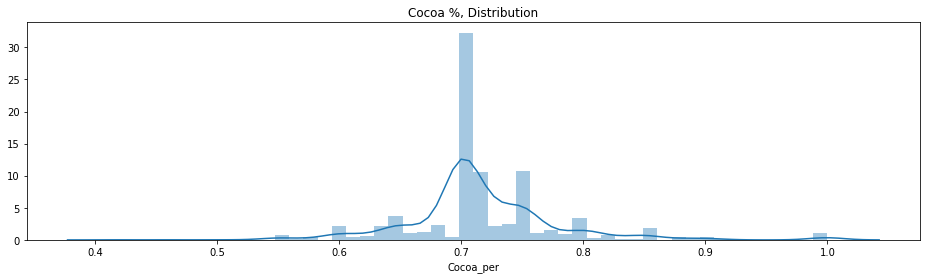

In [51]:
## Look at distribution of Cocoa %
fig = plt.figure(figsize=[16,4])
sns.distplot(chocolate_data['Cocoa_per']).set_title('Cocoa %, Distribution')
plt.show()

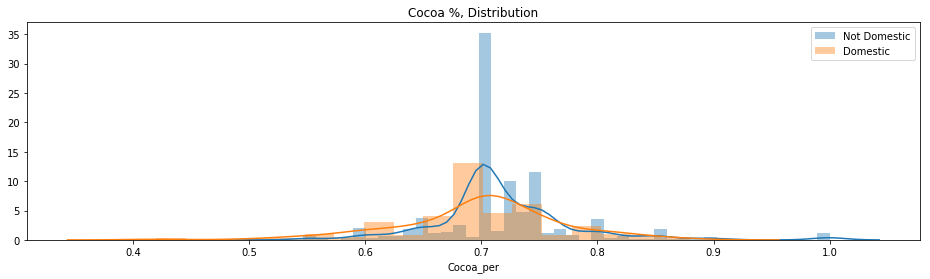

In [56]:
## Look at distribution of cocoa percentage
fig, ax = plt.subplots(figsize=[16,4])
for i, c in chocolate_data.groupby('is_domestic'):
    sns.distplot(c['Cocoa_per'], ax=ax, label=['Not Domestic', 'Domestic'][i])
ax.set_title('Cocoa %, Distribution')
ax.legend()
plt.show()

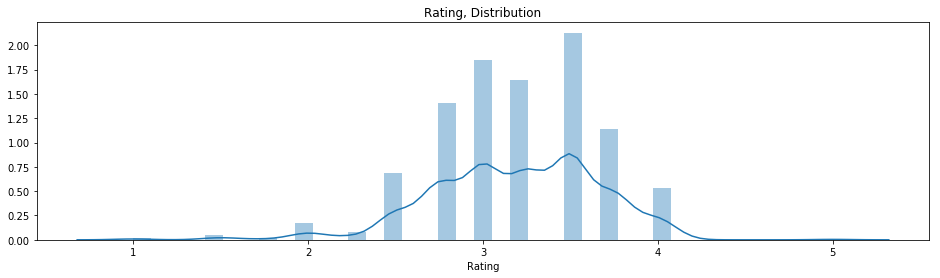

In [57]:
## Look at distribution of rating
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(chocolate_data['Rating'], ax=ax)
ax.set_title('Rating, Distribution')
plt.show()

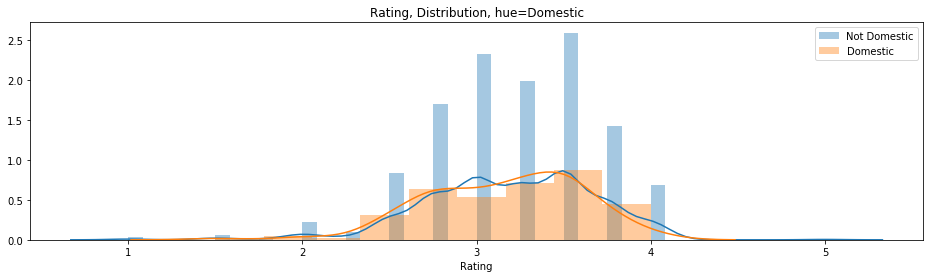

In [58]:
## Look at distribution of rating
fig, ax = plt.subplots(figsize=[16,4])
for i, c in chocolate_data.groupby('is_domestic'):
    sns.distplot(c['Rating'], ax=ax, label=['Not Domestic', 'Domestic'][i])
ax.set_title('Rating, Distribution, hue=Domestic')
ax.legend()
plt.show()

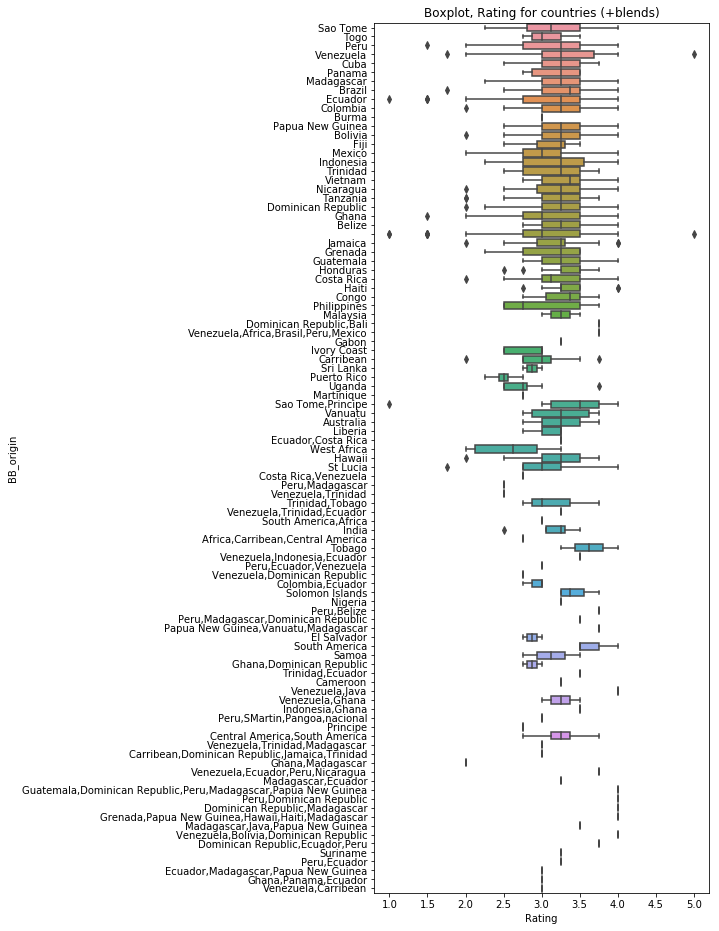

In [60]:
## Look at boxplot over the countries, even Blends
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=chocolate_data,
    y='BB_origin',
    x='Rating'
)
ax.set_title('Boxplot, Rating for countries (+blends)')
plt.show()

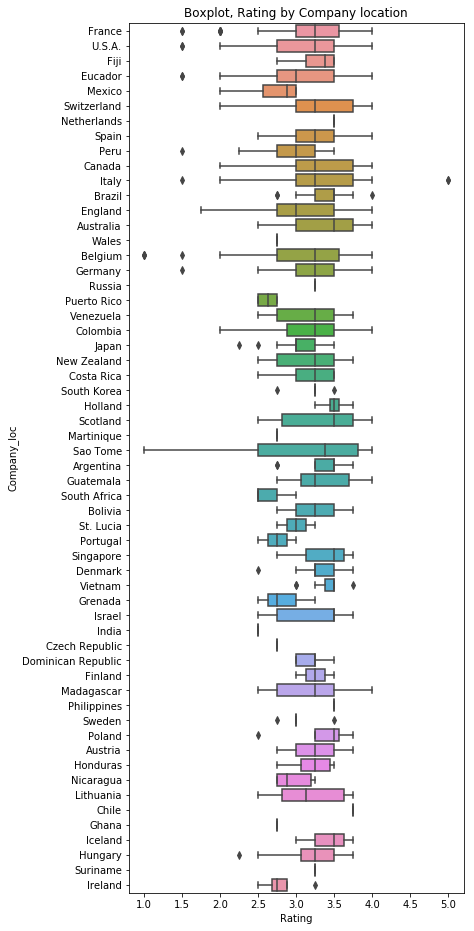

In [65]:
## Look at rating by company location
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=chocolate_data,
    y='Company_loc',
    x='Rating'
)
ax.set_title('Boxplot, Rating by Company location')
plt.show()

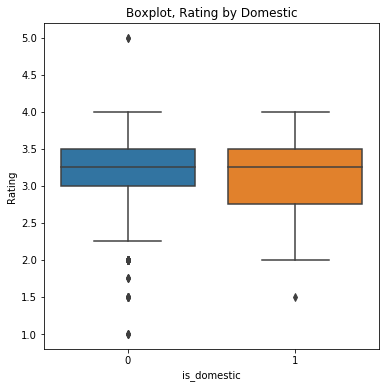

In [71]:
## What better? Domestic Or not?
fig, ax = plt.subplots(figsize=[6, 6])
sns.boxplot(
    data=chocolate_data,
    x='is_domestic',
    y='Rating'
)
ax.set_title('Boxplot, Rating by Domestic')
plt.show()

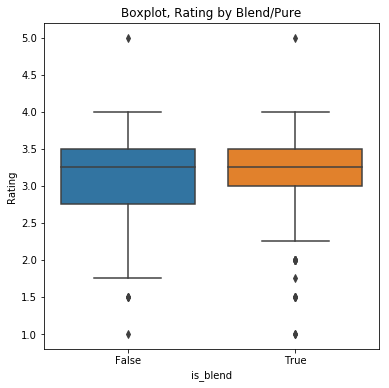

In [72]:
## What better? Pure or blend?
fig, ax = plt.subplots(figsize=[6, 6])
sns.boxplot(
    data=chocolate_data,
    x='is_blend',
    y='Rating',
)
ax.set_title('Boxplot, Rating by Blend/Pure')
plt.show()

### Looks like
* Domestic is worse
* Blend is better

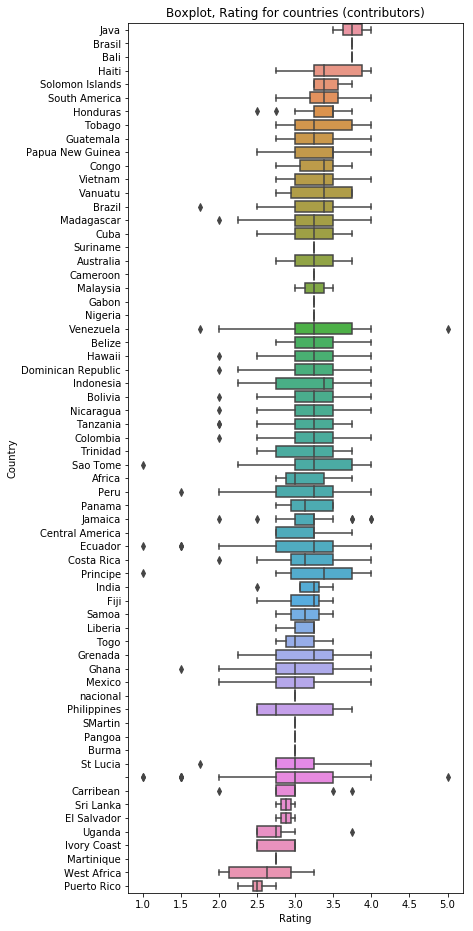

In [100]:
## But hot we can see what country is biggest contributor in rating?
choco_data = pd.DataFrame(columns=['Rating','Country'])
for c in chocolate_data[['BB_origin', 'Rating']].values:
    countries = c[0].split(',')
    for country in countries:
        choco_data = choco_data.append({'Rating':c[1], 'Country':country}, ignore_index=True)

choco_data['mean_rating'] = choco_data.groupby('Country')['Rating'].transform('mean')

fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=choco_data.sort_values('mean_rating', ascending=False),
    y='Country',
    x='Rating'
)
ax.set_title('Boxplot, Rating for countries (contributors)')
plt.show()

In [104]:
choco_data.groupby('Country')['Rating'].mean().sort_values(ascending=False).head()

Country
Java               3.7500
Bali               3.7500
Brasil             3.7500
Haiti              3.4500
Solomon Islands    3.4375
Name: Rating, dtype: float64

In [105]:
choco_data.head()

,Rating,Country,mean_rating
0,3.75,Sao Tome,3.176471
1,2.75,Togo,3.083333
2,3.00,Togo,3.083333
3,3.50,Togo,3.083333
4,3.50,Peru,3.159091
